In [548]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [549]:
img_array = cv2.imread("C:/Users/91889/OneDrive/Desktop/Test_Dataset/closed_eye/s0001_00002_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

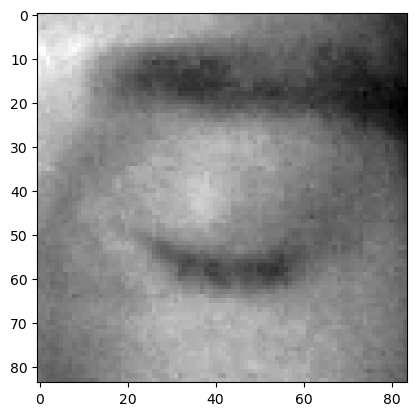

In [550]:
plt.imshow(img_array,cmap="gray")

In [551]:
img_array.shape

(84, 84)

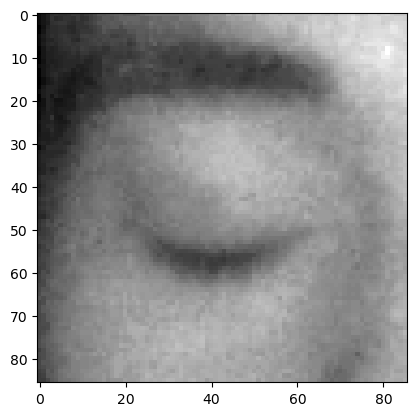

In [552]:
Datadirectory = "C:/Users/91889/OneDrive/Desktop/Test_Dataset" ##training the dataset
Classes = ["closed_eye","open_eye"] ## List of Classes
for category in Classes:
    path =os.path.join(Datadirectory, category) ##
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break 
    break

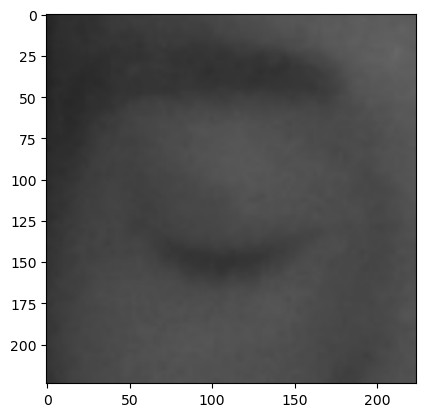

In [553]:
img_size= 224

new_array= cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# reading all the images and converting them into an array for data and labels

In [554]:
training_Data = []

def create_training_Data():##creating a class
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
                


In [555]:
create_training_Data()

In [556]:
print(len(training_Data))

2000


In [557]:
import random

random.shuffle(training_Data)

In [558]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)    

In [559]:
X.shape

(2000, 224, 224, 3)

In [560]:
# normalize the data
X= X/255.0;  ## we are normalizing it

In [561]:
Y= np.array(y)

In [562]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [563]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# deep learning model for training - Transfer Learning

In [589]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [590]:
model = tf.keras.applications.mobilenet.MobileNet()

In [591]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

# Transfer Learning

In [592]:
base_input = model.layers[0].input  ##input

In [593]:
base_output = model.layers[-4].output

In [594]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)   ## one node (1/ 0)
final_output = layers.Activation('sigmoid')(final_output)

In [595]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [596]:
new_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

# settings for binary classification (open / closed)

In [597]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [598]:
new_model.fit(X,Y, epochs = 5 ,validation_split = 0.1) ## training

Epoch 1/5
57/57 [==============================] - 127s 2s/step - loss: 0.1406 - accuracy: 0.9589 - val_loss: 8.5868 - val_accuracy: 0.5700
Epoch 2/5
57/57 [==============================] - 117s 2s/step - loss: 0.0486 - accuracy: 0.9844 - val_loss: 2.8862 - val_accuracy: 0.7950
Epoch 3/5
57/57 [==============================] - 116s 2s/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 1.5900 - val_accuracy: 0.8700
Epoch 4/5
57/57 [==============================] - 116s 2s/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.2114 - val_accuracy: 0.9400
Epoch 5/5
57/57 [==============================] - 115s 2s/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 0.2982 - val_accuracy: 0.9550


In [599]:
new_model.save('my_model.h5')

# checking the network for predictions

In [600]:
img_array = cv2.imread("C:\\Users\\91889\\OneDrive\\Desktop\\Test_Dataset\\closed_eye\\s0001_00027_0_0_0_0_0_01.png" , cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [601]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [602]:
X_input.shape


(1, 224, 224, 3)

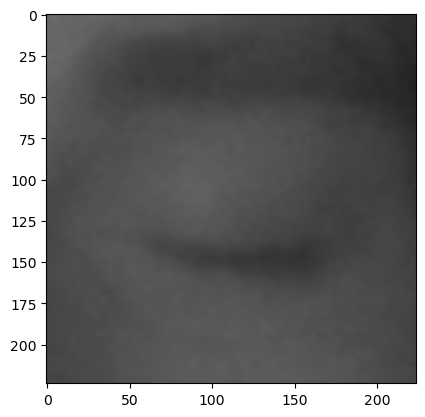

In [603]:
plt.imshow(new_array)

In [604]:
X_input=X_input/255.0

In [605]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 407ms/step


In [606]:
prediction  ## 1 --> closed , 0 --> open
             

array([[1.25690595e-11]], dtype=float32)

In [607]:
img_array = cv2.imread("C:\\Users\\91889\\OneDrive\\Desktop\\Test_Dataset\\open_eye\\s0001_02558_0_1_1_1_0_01.png" , cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [608]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [609]:
X_input.shape

(1, 224, 224, 3)

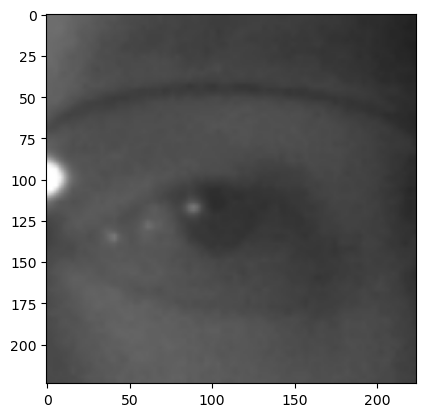

In [610]:
plt.imshow(new_array)

In [611]:
X_input=X_input/255.0

In [612]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 29ms/step


In [613]:
prediction  ## 1 --> closed , 0 --> open

array([[0.9999998]], dtype=float32)

# Let's check on unknown images

In [614]:
import cv2
import numpy as np

In [615]:
img = cv2.imread("C:\\Users\\91889\\OneDrive\\Desktop\\Test_Dataset\\open_eye.png")

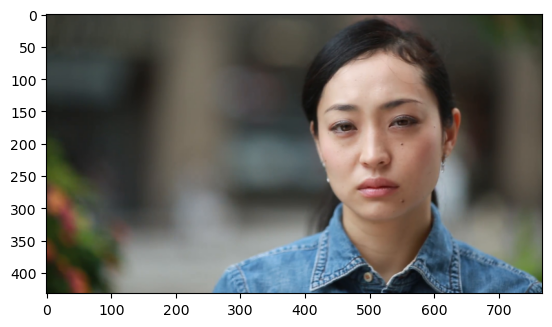

In [616]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [617]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\91889\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')

In [618]:
#detecting face

img = cv2.imread("C:\\Users\\91889\\OneDrive\\Desktop\\Test_Dataset\\open_eye.png")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray, 1.1, 4)

In [619]:
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255, 0),2)

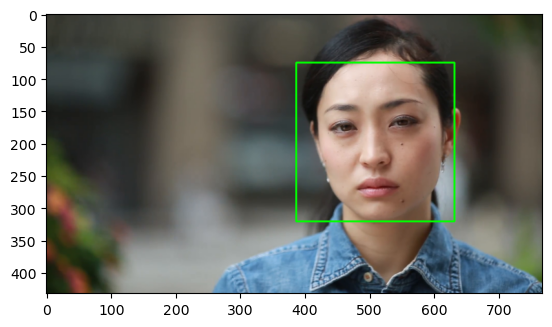

In [620]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [621]:
#Detecting only eys 

eye_cascade = cv2.CascadeClassifier('C:\\Users\\91889\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\haarcascade_eye.xml')

In [622]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [623]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [624]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255, 0),2)

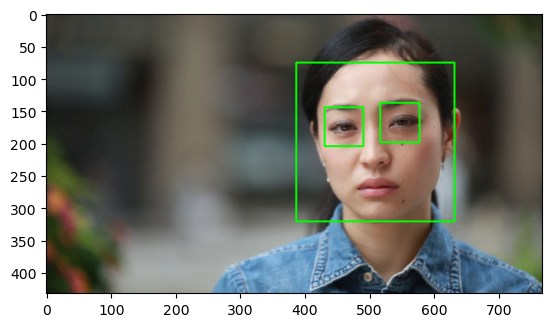

In [625]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# cropping the eye image

In [626]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      
    #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes)==0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

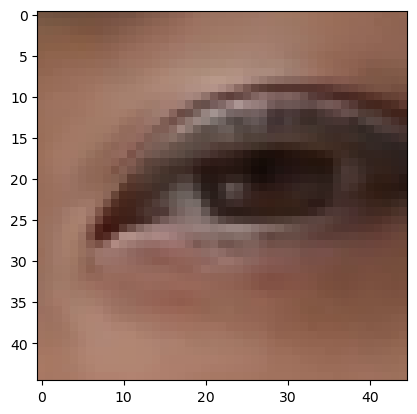

In [627]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [628]:
eyes_roi.shape

(45, 45, 3)

In [629]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)  ## need fourth dimension
final_image=final_image/255.0

In [630]:
final_image.shape

(1, 224, 224, 3)

In [631]:
new_model.predict(final_image)

1/1 [==============================] - 0s 31ms/step


array([[0.9999999]], dtype=float32)